In [43]:
import numpy as np
import matplotlib.pyplot as plt

from funciones import *

In [44]:
# Vamos a crear una función para simular un espectro de radiación de cuerpo negro.
def black_body(T, wavel=np.linspace(400,850,500)):
    # para probar voy a meter una gausiana
    return np.exp(-(wavel-600)**2 / 500)

# Vamos a crear una función para obtener la reflexión en luz
# no polarizada

def Rtotal(n, d, wavelengths, inputs, theta0=0):
    Rss = []
    Rpp = []
    inputs = inputs(0, wavelengths)
    for wavel in wavelengths:
        Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0 = np.pi / 180 * 40)
        Rss.append(Rs)
        Rpp.append(Rp)
    Rss = np.array(Rss)  
    Rpp = np.array(Rpp)  

    return (np.sum(Rss * inputs) + np.sum(Rpp * inputs)) / 2 / np.sum(inputs)

# una función que nos de la reflexión (suma de las componentes entre 2)
def R(n, d, wavelengths, theta0 = 0):
    Rss = []
    Rpp = []
    for wavel in wavelengths:
        Rs, Rp, Ts, Tp = multicapa(n, d, wavel, theta0 = np.pi / 180 * 40)
        Rss.append(Rs)
        Rpp.append(Rp)
    Rss = np.array(Rss)  
    Rpp = np.array(Rpp)  

    return (Rss + Rpp) / 2



In [51]:
n = [1] +  [1.5] + [1, 1.5] * 15 + [1]
d = [0] + [100] + [500, 200] * 15 + [0]


wavelengths = np.linspace(400, 850)

a =  Rtotal(n, d, wavelengths, black_body)

print(a)

0.2856329571327599


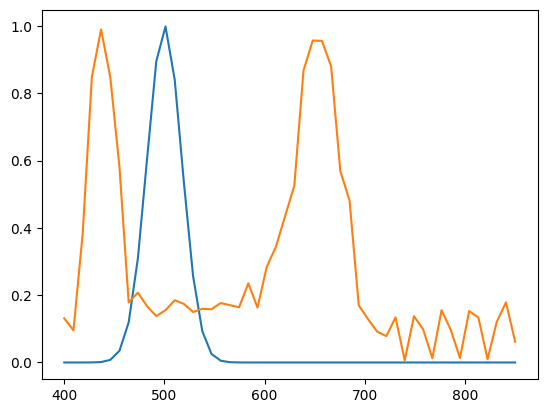

In [52]:
y = np.exp(-(wavelengths-500)**2 / 600)
Ra = R(n, d, wavelengths)
plt.plot(wavelengths, y)
plt.plot(wavelengths, Ra)

> Con esto ya estamos en condiciones de optimizar nuestro sistema.
>
> Vamos a usar un algoritmo genético, el fitness sería el "Rtotal" que hemos definido, es decir cuanto porcentaje de la luz incidente es reflejada.
>
> Nuestra población serán distintas conbinaciones de n y d. (podemos probar que todos sean n alternante y dejar variar solo el d).